# Dataset creation by scraping wikipedia

Goal: Scrape & clean a list of disney wikipedia pages to create a dataset

The name & links of movies are in several tables of the webpage https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films

## Step #1: Learning to get Info Box from a specific wikipedia page (store items in Python dictionary)

In [1]:
from bs4 import BeautifulSoup
import requests


sending a get request to a sample movie from the table (Toy_Story_3) and check the status code of the request.

In [2]:
res = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")
print(res.status_code)

200


parse the HTML content of the response using BeautifulSoup and then print out the prettified version of the HTML.

In [3]:
soup = BeautifulSoup(res.content,'html.parser')
contents = soup.prettify()
print(contents)


<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Toy Story 3 - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled

find the infobox table/section of the webpage using BeautifulSoup and then iterate through each row of table within the infobox, printing out the prettified version of each row.

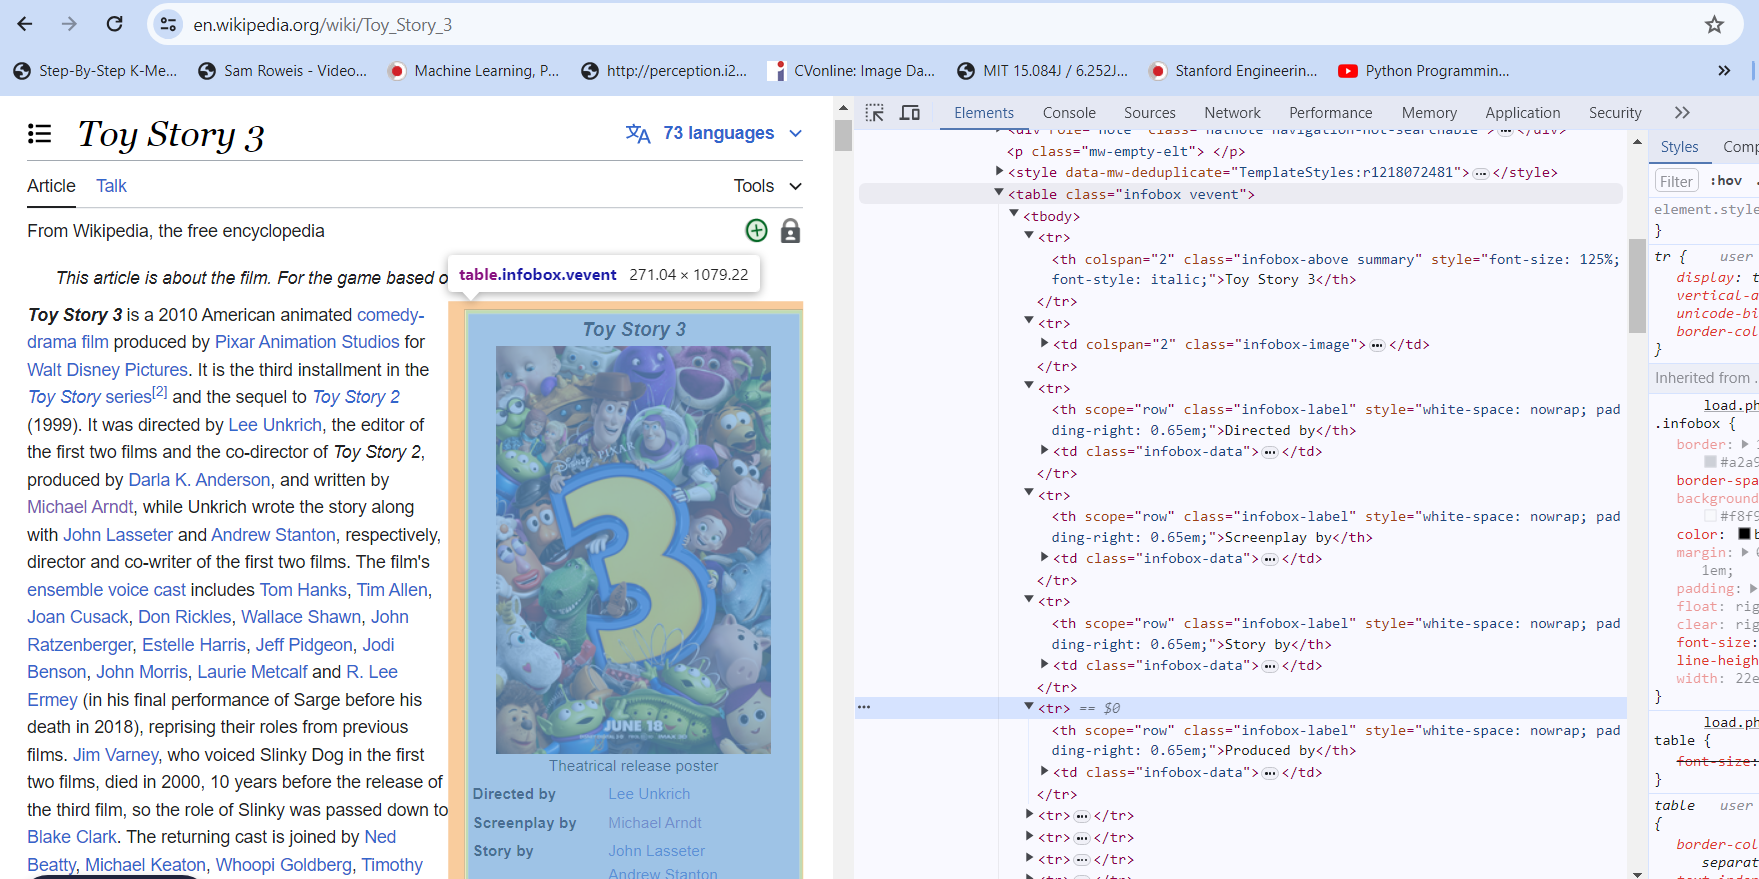

In [4]:
infobox = soup.find(class_="infobox vevent")
for row in infobox.find_all("tr"):
    print(row.prettify())
    print("\n")

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Toy Story 3
 </th>
</tr>



<tr>
 <td class="infobox-image" colspan="2">
  <span class="mw-default-size" typeof="mw:File/Frameless">
   <a class="mw-file-description" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3. The release date &quot;June 18&quot; is displayed on the bottom.">
    <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3. The release date &quot;June 18&quot; is displayed on the bottom." class="mw-file-element" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
   </a>
 

iterate through each row in the infobox, extracting key-value pairs of movie attributes. The 'title' attribute is extracted separately from the first row. If the row contains a list, it gathers all list items. Otherwise, it retrieves the text content of the cell. The extracted movie information is stored in a dictionary called 'movie_info' and returned.

In [5]:
infobox = soup.find(class_="infobox vevent")
movie_info = {}
for index,row in enumerate(infobox.find_all("tr")):
    if index == 0:
        movie_info['title'] = row.find("th").get_text()
    elif index == 1:
        pass
    else:
        key = row.find("th").get_text()
        if row.find("li"):
            content = [item.get_text() for item in row.find_all("li")]
        else:
            content = row.find("td").get_text()
        movie_info[key]=content
movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Productioncompanies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney StudiosMotion Pictures',
 'Release dates': ['June\xa012,\xa02010\xa0(2010-06-12) (Taormina Film Fest)',
  'June\xa018,\xa02010\xa0(2010-06-18) (United States)'],
 'Running time': '103 minutes[1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200\xa0million[1]',
 'Box office': '$1.067\xa0billion[1]'}

redoing the previous section and removing the annoying "\xa0" text...

In [6]:
infobox = soup.find(class_="infobox vevent")
movie_info = {}
for index,row in enumerate(infobox.find_all("tr")):
    if index == 0:
        movie_info['title'] = row.find("th").get_text()
    elif index == 1:
        pass
    else:
        key = row.find("th").get_text().replace("\xa0"," ")
        if row.find("li"):
            content = [item.get_text().replace("\xa0"," ") for item in row.find_all("li")]
        else:
            content = row.find("td").get_text().replace("\xa0"," ")
        movie_info[key]=content
movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Productioncompanies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney StudiosMotion Pictures',
 'Release dates': ['June 12, 2010 (2010-06-12) (Taormina Film Fest)',
  'June 18, 2010 (2010-06-18) (United States)'],
 'Running time': '103 minutes[1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million[1]',
 'Box office': '$1.067 billion[1]'}

fixing the concatenation of `Productioncompanies` by using the `separator` keyword of get_text() method.

When an element contains multiple child elements, such as paragraphs with span tags or lists with list items, the default behavior of the get_text() is to concatenate the text of all the child elements into one string, effectively removing any distinction between them. However, by specifying the separator argument, we can control what character or string should be used to separate the text content of each child element. 

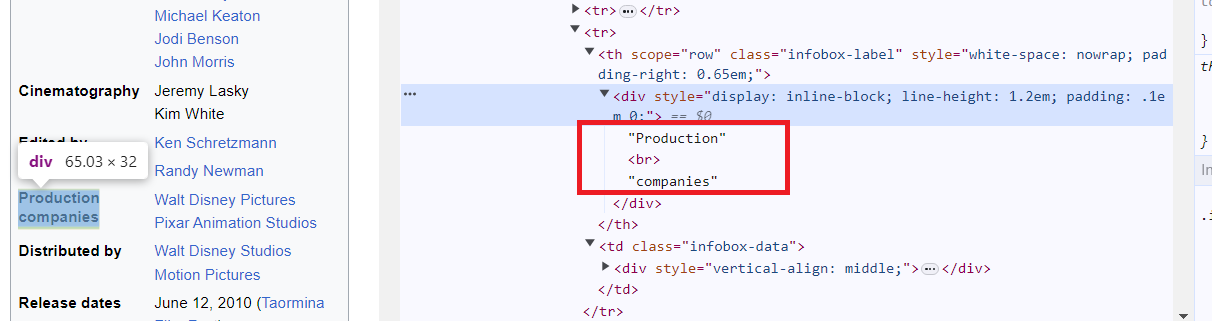

In [7]:
infobox = soup.find(class_="infobox vevent")
movie_info = {}
for index,row in enumerate(infobox.find_all("tr")):
    if index == 0:
        movie_info['title'] = row.find("th").get_text(" ", strip=True)
    elif index == 1:
        pass
    else:
        key = row.find("th").get_text(" ", strip=True).replace("\xa0"," ")
        if row.find("li"):
            content = [item.get_text(" ", strip=True).replace("\xa0"," ") for item in row.find_all("li")]
        else:
            content = row.find("td").get_text(" ", strip=True).replace("\xa0"," ")
        movie_info[key]=content
movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release dates': ['June 12, 2010 ( 2010-06-12 ) ( Taormina Film Fest )',
  'June 18, 2010 ( 2010-06-18 ) (United States)'],
 'Running time': '103 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [1]',
 'Box office': '$1.067 billion [1]'}

Nice! We learned how to extract infobox data from a single wikipedia page. Now, we want to extract this information from all the movies in the tables of the Disney Picture Films page.

## Step 2: Get info box for all movies

fetching the parent page which contains the tables of the movies names & links:

In [8]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")
print(res.status_code)
soup = BeautifulSoup(res.text, 'html.parser')
content = soup.prettify()
print(content)

200
<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Walt Disney Pictures films - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vec

Consolidating the tasks from the previous section into one function:

In [9]:
def get_content(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    infobox = soup.find(class_="infobox vevent")
    movie_info = {}
    for index,row in enumerate(infobox.find_all("tr")):
        if index == 0:
            movie_info['title'] = row.find("th").get_text(" ", strip=True)
        elif index == 1:
            pass
        else:
            key = row.find("th").get_text(" ", strip=True).replace("\xa0"," ")
            if row.find("li"):
                content = [item.get_text(" ", strip=True).replace("\xa0"," ") for item in row.find_all("li")]
            else:
                content = row.find("td").get_text(" ", strip=True).replace("\xa0"," ")
            movie_info[key]=content
    return movie_info

All the tables we are seeking have the same class: "wikitable sortable".

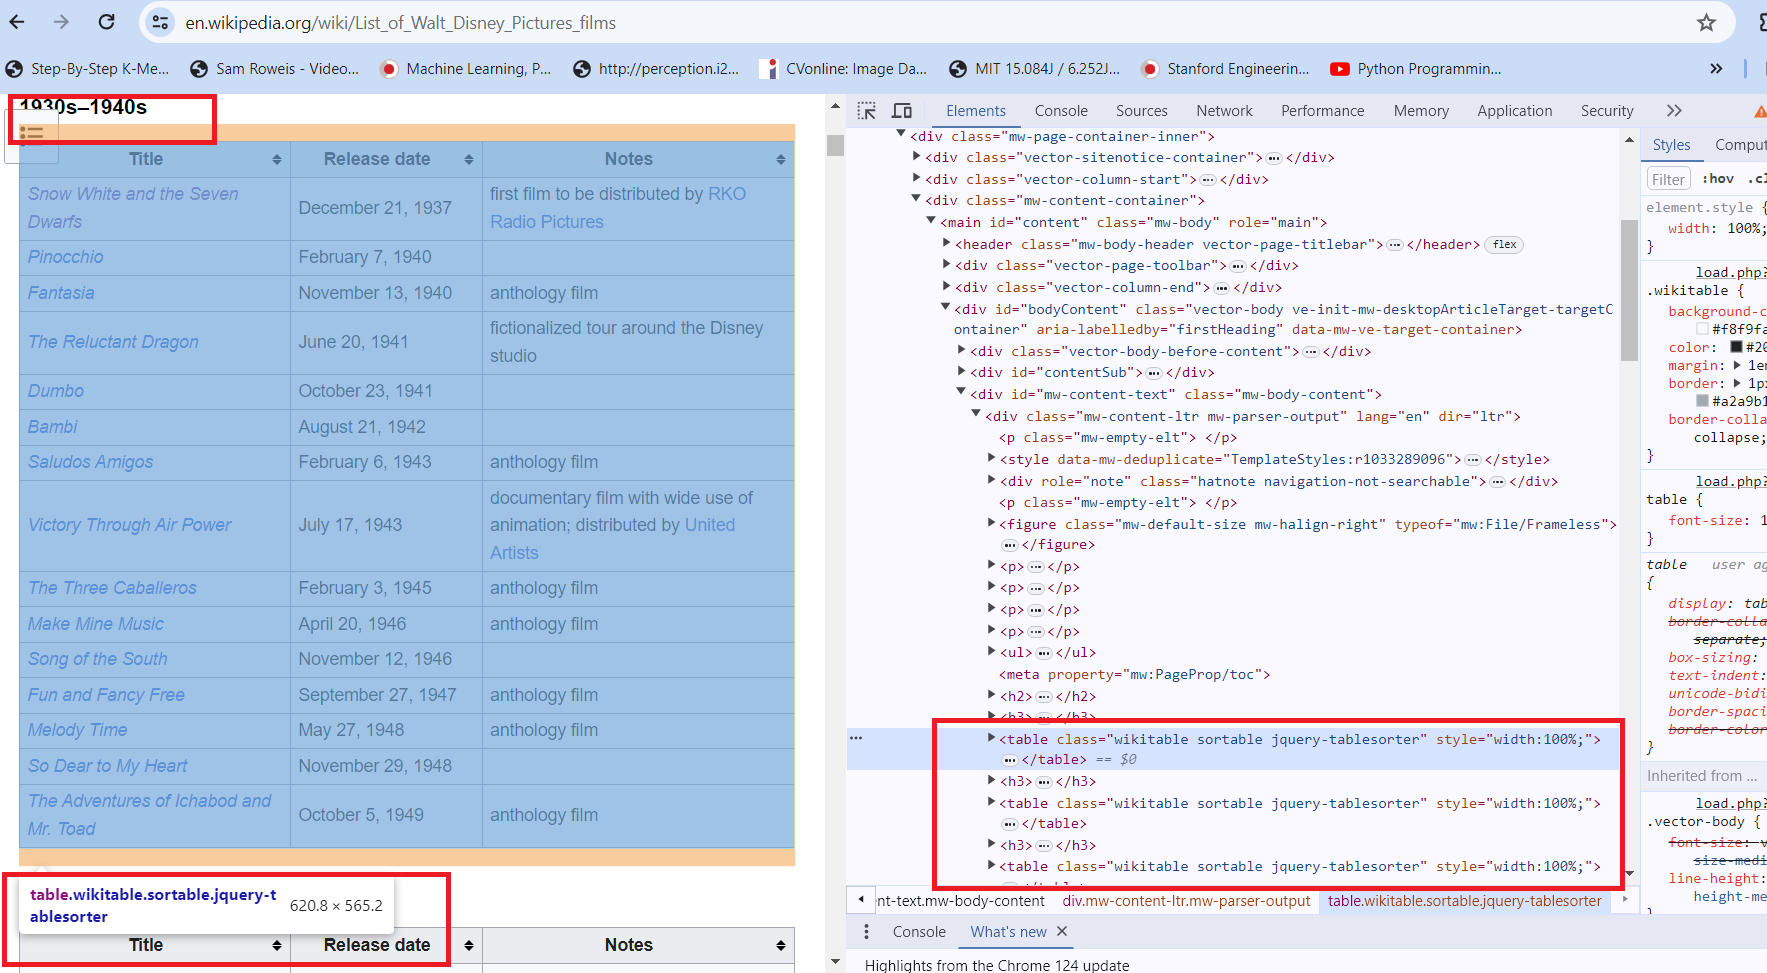

For each table, we are searching for "tr" elements (representing rows of the table). The initial element of each row is italicized and contains a link to the movie's Wikipedia page. We extract the relative URL of the link.

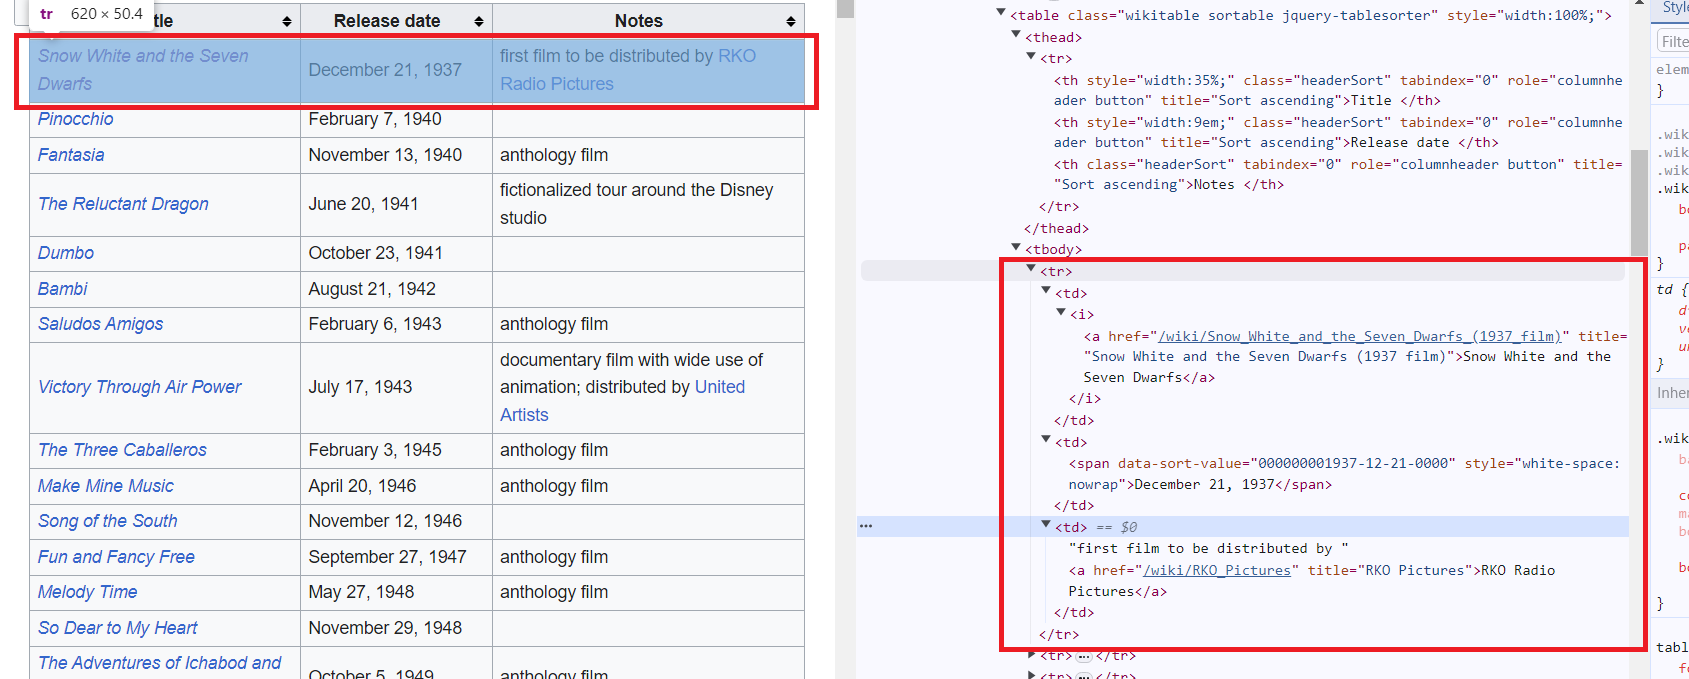

We locate the absolute URL path of the movie and utilize the previously written function to retrieve the infobox data in the form of a dictionary.

In [10]:
# Warning: this cell takes 15-25 minutes to finish excuting
tables = soup.find_all(class_="wikitable sortable")
movies_info = []
for table in tables:
    rows = table.find_all("tr")
    for index,row in enumerate(rows):
        if index>0 : # do not consider the first row, which is the head of each table
            try: # some movies do not have links so we put everything in try, except block.
                relative_path = row.i.a['href']
                path = "https://wikipedia.org"+relative_path
                movies_info.append(get_content(path)) #get infobox of the linked page and save the dictionary
                #text = row.get_text()
                print(len(movies_info))
            except:
                pass

        


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


We have scraped data for 540 movies!

In [11]:
len(movies_info)


540

convert everything into a dataframe!

In [12]:
import pandas as pd
df = pd.DataFrame(movies_info)
df.to_csv("raw_scraped_movies.csv")
df

,title,Directed by,Story by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,...,Countries,Color process,Production companies,Layouts by,Music,Lyrics,Book,Basis,Productions,Awards
0,Snow White and the Seven Dwarfs,"[David Hand, Perce Pearce, William Cottrell, L...","[Ted Sears, Richard Creedon, Otto Englander, D...",""" Snow White "" by the Brothers Grimm",Walt Disney,"[Adriana Caselotti, Roy Atwell, Pinto Colvig, ...","[Frank Churchill, Leigh Harline, Paul Smith]",Walt Disney Productions,RKO Radio Pictures,"[December 21, 1937 ( 1937-12-21 ) ( Carthay Ci...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pinocchio,"[Ben Sharpsteen, Hamilton Luske, Bill Roberts,...","[Ted Sears, Otto Englander, Webb Smith, Willia...",The Adventures of Pinocchio by Carlo Collodi,Walt Disney,"[Cliff Edwards, Dickie Jones, Christian Rub, W...","[Leigh Harline, Paul J. Smith]",Walt Disney Productions,RKO Radio Pictures,"[February 7, 1940 ( 1940-02-07 ) ( Center Thea...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fantasia,"[Samuel Armstrong, James Algar, Bill Roberts, ...","[Joe Grant, Dick Huemer]",NaN,"[Walt Disney, Ben Sharpsteen]","[Leopold Stokowski, Deems Taylor]",See plot,Walt Disney Productions,RKO Radio Pictures,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Reluctant Dragon,Alfred Werker (live action) Hamilton Luske (an...,NaN,NaN,Walt Disney,Robert Benchley Frances Gifford Buddy Pepper N...,Frank Churchill Larry Morey,Walt Disney Productions,RKO Radio Pictures,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dumbo,"[Ben Sharpsteen, Norman Ferguson, Wilfred Jack...","[Joe Grant, Dick Huemer]","Dumbo, the Flying Elephant by Helen Aberson Ha...",Walt Disney,"[Edward Brophy, Verna Felton, Cliff Edwards, H...",Frank Churchill Oliver Wallace,Walt Disney Productions,RKO Radio Pictures,"[October 23, 1941 ( 1941-10-23 ) (New York Cit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,The Aristocats,Wolfgang Reitherman,"[Ken Anderson, Larry Clemmons, Eric Cleworth, ...","[Tom McGowan, Tom Rowe]",Winston Hibler Wolfgang Reitherman,"[Phil Harris, Eva Gabor, Sterling Holloway, Sc...",George Bruns,Walt Disney Productions,Buena Vista Distribution,"[December 11, 1970 ( 1970-12-11 ) (premiere), ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,The Parent Trap,NaN,NaN,Lisa and Lottie by Erich Kästner,NaN,NaN,NaN,NaN,The Walt Disney Company,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,The Rocketeer,Joe Johnston,"[Danny Bilson, Paul De Meo, William Dear]",The Rocketeer by Dave Stevens,"[Charles Gordon, Lawrence Gordon, Lloyd Levin]","[Billy Campbell, Alan Arkin, Jennifer Connelly...",James Horner,NaN,Buena Vista Pictures Distribution,NaN,...,NaN,NaN,"[Walt Disney Pictures [1], Touchstone Pictures...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,Three Men and a Baby,Leonard Nimoy,NaN,Trois hommes et un couffin by Coline Serreau,"[Ted Field, Robert W. Cort]","[Tom Selleck, Steve Guttenberg, Ted Danson]",Marvin Hamlisch,NaN,Buena Vista Pictures Distribution,NaN,...,NaN,NaN,"[Touchstone Pictures, Silver Screen Partners I...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['title', 'Directed by', 'Story by', 'Based on', 'Produced by',
       'Starring', 'Music by', 'Production company', 'Distributed by',
       'Release dates', 'Running time', 'Country', 'Language', 'Budget',
       'Box office', 'Cinematography', 'Release date', 'Written by',
       'Edited by', 'Narrated by', 'Languages', 'Screenplay by', 'Countries',
       'Color process', 'Production companies', 'Layouts by', 'Music',
       'Lyrics', 'Book', 'Basis', 'Productions', 'Awards'],
      dtype='object')

## Step #3: Clean our data!

##### 3.1. convert `Running time` column to integer.

In [14]:
df["Running time"]

0                 83 minutes
1                 88 minutes
2            126 minutes [1]
3                 74 minutes
4                 64 minutes
               ...          
535               79 minutes
536    508 minutes (5 films)
537          108 minutes [2]
538              102 minutes
539    515 minutes (7 films)
Name: Running time, Length: 540, dtype: object

In [15]:
def minutes_to_integer(running_time):
    if pd.isna(running_time):
        return None
    else:
        return int(running_time.split(" ")[0])
df["Running time"]=df["Running time"].apply(minutes_to_integer)

##### 3.2 Cleaning & Converting `Budget` and `Box office` columns to float.

In [16]:
a = df["Budget"]

In [17]:
import re 
def money_conversion(money):
    if isinstance(money, list):
        money = money[0]
        
    if pd.isna(money):
        return None
    else:
        match = re.search(r"\$\d+(,\d{3})*(\.)*\d*", money)
        if match:
            value = match.group()
            value = value.replace(",","")
            value = value.replace("$","")
            value = float(value)
            amount_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
            amount_key = re.search(r"thousand|million|billion", money, flags=re.IGNORECASE)
            if amount_key:
                amount_key = amount_key.group()
                value = value * amount_dict[amount_key]
            return value
        else:
            return None
df["Budget"] = df["Budget"].apply(money_conversion)

In [18]:
df["Box office"] = df["Box office"].apply(money_conversion)

##### 3.3. converting `Release date` to datetime format

In [19]:
df["Release date"]

0                                     NaN
1                                     NaN
2      [November 13, 1940 ( 1940-11-13 )]
3      [June 27, 1941 ( 1941-06-27 ) [1]]
4                                     NaN
                      ...                
535                                   NaN
536                         1961– present
537        [June 21, 1991 ( 1991-06-21 )]
538    [November 25, 1987 ( 1987-11-25 )]
539                                   NaN
Name: Release date, Length: 540, dtype: object

In [20]:
from datetime import datetime

def convert_date(date):
    if isinstance(date, list):
            date = date[0]
    if pd.isna(date):
        return None    
    date = date.split("(")[0].strip()
    try:
        date_new = datetime.strptime(date, '%B %d, %Y')
        return date_new
    except:
        return None

df["Release date"] = df["Release date"].apply(convert_date)
df["Release date"]

0            NaT
1            NaT
2     1940-11-13
3     1941-06-27
4            NaT
         ...    
535          NaT
536          NaT
537   1991-06-21
538   1987-11-25
539          NaT
Name: Release date, Length: 540, dtype: datetime64[ns]

In [21]:
df["Release dates"] = df["Release dates"].apply(convert_date)
df["Release dates"]

0     1937-12-21
1     1940-02-07
2            NaT
3            NaT
4     1941-10-23
         ...    
535   1970-12-11
536          NaT
537          NaT
538          NaT
539          NaT
Name: Release dates, Length: 540, dtype: datetime64[ns]

combining two columns of `Release date` and `Release dates`:

In [22]:
df["Release date"].fillna(df["Release dates"], inplace=True)
df.drop(['Release dates'], axis=1, inplace=True)

## Step 4: saving the dataframe

In [23]:
df.to_csv("disney_movies_wiki.csv")

Inspired by:

https://github.com/KeithGalli/disney-data-science-tasks/blob/master/Dataset-Creation.ipynb